In [1]:
import os
import json

file_path = os.path.abspath('../stylus/cache/civit_catalog.json')
# Load the catalog
with open(file_path, 'r') as f:
    catalog = json.load(f)

In [2]:
model_types = ['LORA', 'TextualInversion', 'Hypernetwork', 'LoCon']
civit_data = {}
for model_data in catalog:
    model_type = model_data['type']
    if model_type in model_types:
        for mv_dict in model_data['modelVersions']:
            base_model = mv_dict['baseModel']
            if base_model not in civit_data:
                civit_data[base_model] = {}
            if model_type not in civit_data[base_model]:
                civit_data[base_model][model_type] = 0
            civit_data[base_model][model_type] += 1
# Adding locon, as it is a type of lora.
civit_data['SD 1.5']['LORA'] += civit_data['SD 1.5'].get('LoCon', 0)
civit_data['SDXL 1.0']['LORA'] += civit_data['SDXL 1.0'].get('LoCon', 0)
print(civit_data)


{'SD 1.5': {'LORA': 108092, 'TextualInversion': 7559, 'LoCon': 7082, 'Hypernetwork': 317}, 'SDXL 1.0': {'LORA': 14363, 'LoCon': 957, 'TextualInversion': 149}, 'Other': {'TextualInversion': 119, 'LORA': 7240, 'LoCon': 537, 'Hypernetwork': 43}, 'SD 2.1': {'TextualInversion': 51, 'LoCon': 8, 'LORA': 108, 'Hypernetwork': 2}, 'SD 2.0': {'LORA': 156, 'TextualInversion': 8, 'Hypernetwork': 3, 'LoCon': 3}, 'SD 1.4': {'LORA': 286, 'LoCon': 14, 'TextualInversion': 219, 'Hypernetwork': 7}, 'Pony': {'LORA': 3273, 'LoCon': 164, 'TextualInversion': 4}, 'SD 2.1 768': {'LORA': 581, 'TextualInversion': 116, 'LoCon': 63, 'Hypernetwork': 2}, 'SD 2.0 768': {'TextualInversion': 46, 'LORA': 11, 'Hypernetwork': 1}, 'SDXL 0.9': {'LoCon': 21, 'LORA': 59}, 'SDXL Turbo': {'LORA': 29, 'TextualInversion': 3}, 'SDXL 1.0 LCM': {'LORA': 10}, 'Stable Cascade': {'LORA': 37}, 'SDXL Distilled': {'LORA': 6}, 'PixArt a': {'LORA': 17}, 'SDXL Lightning': {'LORA': 9}, 'Playground v2': {'LORA': 3}, 'SD 1.5 LCM': {'LORA': 3}, '

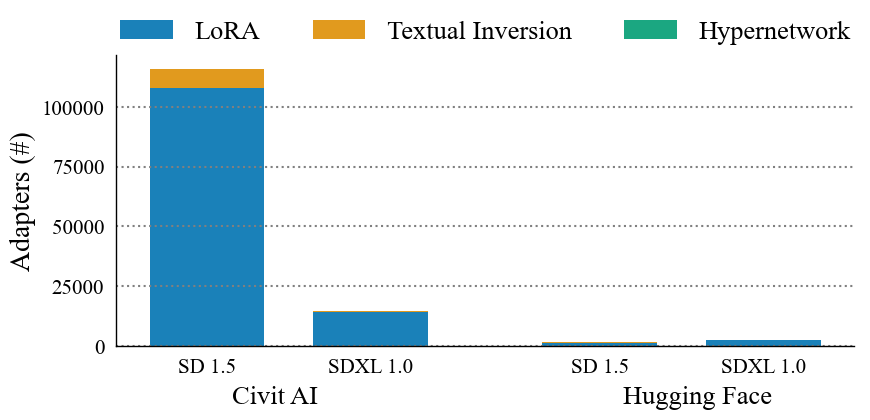

In [5]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
# Hugginface Statistics
# https://huggingface.co/models?other=base_model:runwayml%2Fstable-diffusion-v1-5,lora&sort=trending
#https://huggingface.co/models?other=base_model:runwayml%2Fstable-diffusion-v1-5,dreambooth&sort=trending
# 1,033 + 256 = 1289
#https://huggingface.co/models?other=base_model:runwayml%2Fstable-diffusion-v1-5,textual_inversion&sort=trending
# 274
# https://huggingface.co/models?other=base_model:stabilityai/stable-diffusion-xl-base-1.0,lora
# 2612
# https://huggingface.co/models?other=base_model:stabilityai/stable-diffusion-xl-base-1.0,textual_inversion
# 10
hugging_data = {'SD 1.5': {'LORA': 1289, 'TextualInversion': 274, 'Hypernetwork': 0},
                'SDXL 1.0': {'LORA': 2612, 'TextualInversion': 10, 'Hypernetwork': 0}}
plt.rcParams.update({'font.size': 15})
relevant_keys = ['SD 1.5', 'SDXL 1.0']

# matplotlib.rc('font', serif='cm10')
matplotlib.rc('mathtext', fontset='cm')
# sns.set(style="whitegrid")
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Times New Roman"
sns.set_context("paper")
sns.set_palette("colorblind")


# Adjusting adapters list and adapter_counts for the updated requirement
adapters = ['LORA', 'TextualInversion', 'Hypernetwork']  # Hypernetwork added but it will have 0 as it's not present in the data
adapter_counts_updated = {key: [civit_data[key].get(adapter, 0) for adapter in adapters] for key in relevant_keys}
hugging_counts_updated = {key: [hugging_data[key].get(adapter, 0) for adapter in adapters] for key in relevant_keys}

# Creating a more visually appealing plot
fig, ax = plt.subplots(figsize=(9, 4))
color_palette = sns.color_palette("colorblind")
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.grid(
    color='grey',
    linestyle='dotted',
    linewidth=1.5,
    axis='y',
)

# Defining a color map for better visuals
colors = sns.color_palette("colorblind", n_colors=10)

index = range(len(relevant_keys))

bar_width = 0.35
for i, adapter in enumerate(adapters):
    counts = [adapter_counts_updated[key][i] for key in relevant_keys]
    ax.bar([0,0.5], counts, bar_width, label=adapter, color=colors[i], alpha=0.9,  
           bottom=[sum(adapter_counts_updated[key][:i]) for key in relevant_keys])

for i, adapter in enumerate(adapters):
    counts_hugging = [hugging_counts_updated[key][i] for key in relevant_keys]
    ax.bar([1.2,1.7], counts_hugging, bar_width, color=colors[i], alpha=0.9,
           bottom=[sum(hugging_counts_updated[relevant_keys[j-2]][:i]) for j in range(2, 4)])


# remove upper line and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_ylabel('Adapters (#)', size=20)
ax.set_xticks([0, 0.5, 1.2, 1.7])

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(['SD 1.5', 'SDXL 1.0', 'SD 1.5', 'SDXL 1.0',])
# Change TextualInversion legend to Textual Inversion

asdf = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, frameon=False, fontsize=19)
asdf.texts[1].set_text('Textual Inversion')
asdf.texts[0].set_text('LoRA')

plt.gcf().text(0.31,-.03, "Civit AI", size = 19, ha ='center')
plt.gcf().text(0.78,-0.03, "Hugging Face", size = 19, ha ='center')
plt.tight_layout()
plt.savefig('figures/adapters.pdf', format="pdf", dpi=500, bbox_inches='tight')